In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
HERE = Path.cwd()
DATA_FOLDER = HERE / "data"
# print(DATA_FOLDER)

In [3]:
roster = pd.read_csv(
    DATA_FOLDER / "roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID",
)
#roster.head(10)

In [4]:
hw_exam_grades = pd.read_csv(
    DATA_FOLDER / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda title: "Submission" not in title,
    index_col="SID",
)
hw_exam_grades.head(10)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
ara97741,Amy,Adams,49.0,80,53,80,55,80,78,100,...,39,60,54,60,87,100,74,100,76,100
alw07647,Amy,White,71.0,80,60,80,72,80,95,100,...,47,60,41,60,99,100,95,100,99,100
axd67070,Amy,Dunn,72.0,80,61,80,50,80,90,100,...,48,60,50,60,93,100,96,100,86,100
ajt73762,Amy,Terry,71.0,80,54,80,76,80,93,100,...,54,60,49,60,60,100,81,100,79,100


In [5]:
quiz_grades = pd.DataFrame()

In [6]:
for file_path in DATA_FOLDER.glob("quiz_*_grades.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)


,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5
belinda.bailey@univ.edu,6,10,9,14,4
marcia.stevens@univ.edu,7,15,17,10,12
katelyn.faulkner@univ.edu,6,12,17,14,6
william.daniel@univ.edu,9,10,10,9,5


In [8]:
quiz_grades.head(10)

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5
belinda.bailey@univ.edu,6,10,9,14,4
marcia.stevens@univ.edu,7,15,17,10,12
katelyn.faulkner@univ.edu,6,12,17,14,6
william.daniel@univ.edu,9,10,10,9,5


In [9]:
final_data = pd.merge(
    roster,
    hw_exam_grades,
    left_index=True,
    right_index=True,
)
final_data = pd.merge(
    final_data, quiz_grades, left_on="Email Address", right_index=True
)
final_data = final_data.fillna(0)

In [10]:
final_data.head(10)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7
rxs30280,richard.saunders@univ.edu,1,Richard,Saunders,53.0,80,56,80,48,80,...,100,93,100,64,100,10,8,15,12,12
dma58910,daisy.anderson@univ.edu,2,Daisy,Anderson,64.0,80,52,80,57,80,...,100,66,100,94,100,9,6,10,6,7
hsw06874,holly.watson@univ.edu,2,Holly,Watson,66.0,80,51,80,66,80,...,100,100,100,90,100,11,12,10,6,5
bkr19538,brandy.reilly@univ.edu,2,Brandy,Reilly,70.0,80,80,80,55,80,...,100,67,100,95,100,5,13,6,14,10
lxc64780,lorraine.carter@univ.edu,2,Lorraine,Carter,50.0,80,66,80,62,80,...,100,69,100,99,100,5,13,14,12,10


In [11]:
quiz_grades.columns

Index(['Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5'], dtype='object')

In [12]:
quiz_grades.index

Index(['richard.bennett@univ.edu', 'timothy.parker@univ.edu',
       'carol.reyes@univ.edu', 'brooke.powers@univ.edu',
       'michael.taylor@univ.edu', 'belinda.bailey@univ.edu',
       'marcia.stevens@univ.edu', 'katelyn.faulkner@univ.edu',
       'william.daniel@univ.edu', 'dylan.johnson@univ.edu',
       ...
       'tamara.warren@univ.edu', 'courtney.wolf@univ.edu',
       'brandon.flores@univ.edu', 'patricia.evans@univ.edu',
       'luke.davidson@univ.edu', 'jeffrey.perez@univ.edu',
       'angela.dunlap@univ.edu', 'richard.elliott@univ.edu',
       'donna.nguyen@univ.edu', 'timothy.ramirez@univ.edu'],
      dtype='object', name='Email', length=150)

In [13]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (
        final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"]
    )

In [23]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,8,6,14,9,4,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,8,8,8,13,5,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,0.96,0.80,0.86


In [22]:
hw_max_cols = [x for x in final_data.columns if 'Home' in x and 'Max' in x]

In [32]:
hw_cols = [x for x in final_data.columns if 'Home' in x and 'Max' not in x]

In [35]:
# axis=1 specifies that the sum will be done on the rows
hw_score_by_total = final_data[hw_cols].sum(axis=1)/final_data[hw_max_cols].sum(axis=1)

In [66]:
final_data['HW by Total'] = hw_score_by_total
final_data['Homework Score'] = hw_score_by_total

In [67]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,Quiz Score,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,11,7,10,0.86,0.62,0.90,0.808108,0.608696,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,10,13,6,0.60,0.91,0.93,0.827027,0.681159,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,14,9,4,1.00,0.84,0.64,0.785135,0.594203,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,13,5,0.72,0.83,0.77,0.770270,0.608696,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,11,7,7,0.96,0.80,0.86,0.782432,0.652174,0.782432


In [39]:
hw_max_data = final_data[hw_max_cols].set_axis(hw_cols,axis=1)

In [45]:
quiz_scores = final_data.filter(regex=r"^Quiz \d$")

In [46]:
n_quiz = quiz_scores.shape[1]

In [56]:
quiz_max_points = pd.Series(
{'Quiz 1': 11, 'Quiz 2': 15, 'Quiz 3': 17, 'Quiz 4': 14, 'Quiz 5': 12}
)

In [65]:
quiz_score_by_total = quiz_scores.sum(axis=1)/quiz_max_points.sum()

final_data["Quiz Score"] = quiz_score_by_total

In [58]:
quiz_score_by_total

wxb12345    0.608696
mxl12345    0.681159
txj12345    0.594203
jgf12345    0.608696
smj00936    0.652174
              ...   
pmj37756    0.782609
dsl24347    0.623188
nxe44872    0.768116
bxr62103    0.797101
jxw53347    0.637681
Length: 150, dtype: float64

In [59]:
weights = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

In [60]:
weights.index

Index(['Exam 1 Score', 'Exam 2 Score', 'Exam 3 Score', 'Quiz Score',
       'Homework Score'],
      dtype='object')

In [70]:
final_data[weights.index] 

,Exam 1 Score,Exam 2 Score,Exam 3 Score,Quiz Score,Homework Score
wxb12345,0.86,0.62,0.90,0.608696,0.808108
mxl12345,0.60,0.91,0.93,0.681159,0.827027
txj12345,1.00,0.84,0.64,0.594203,0.785135
jgf12345,0.72,0.83,0.77,0.608696,0.770270
smj00936,0.96,0.80,0.86,0.652174,0.782432
...,...,...,...,...,...
pmj37756,0.84,0.80,0.94,0.782609,0.735135
dsl24347,0.62,0.70,0.90,0.623188,0.822973
nxe44872,0.89,0.63,0.65,0.768116,0.839189
bxr62103,0.90,0.72,0.71,0.797101,0.779730


In [72]:
final_data["Final Score"] = (final_data[weights.index]  * weights).sum(axis=1)

In [73]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,Quiz Score,Homework Score,Final Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,7,10,0.86,0.62,0.90,0.808108,0.608696,0.808108,0.745852
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,6,0.60,0.91,0.93,0.827027,0.681159,0.827027,0.795659
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,9,4,1.00,0.84,0.64,0.785135,0.594203,0.785135,0.722315
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,5,0.72,0.83,0.77,0.770270,0.608696,0.770270,0.725217
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,7,7,0.96,0.80,0.86,0.782432,0.652174,0.782432,0.765625


In [78]:
final_data['Ceiling Score'] = np.ceil(final_data['Final Score']*100)

In [76]:
def get_letter_grade(score):
    if score>=90:
        return 'A'
    elif score>=80:
        return 'B'
    elif score>=70:
        return 'C'
    elif score>=60:
        return 'D'
    else:
        return 'F'

In [82]:
final_data["Final Grade"] = final_data['Ceiling Score'].map(get_letter_grade)

In [83]:
cols_to_write = ["Last Name", "First Name", "Email Address", "Ceiling Score", "Final Grade"]

In [87]:
final_data[final_data.Section == 1][cols_to_write]

,Last Name,First Name,Email Address,Ceiling Score,Final Grade
wxb12345,Barrera,Woody,woody.barrera_jr@univ.edu,75.0,C
txj12345,Joyce,Traci,traci.joyce@univ.edu,73.0,C
rxs30280,Saunders,Richard,richard.saunders@univ.edu,76.0,C
edh14938,Houston,Emily,emily.houston@univ.edu,78.0,C
rjb91830,Bennett,Richard,richard.bennett@univ.edu,79.0,C
bdp78944,Powers,Brooke,brooke.powers@univ.edu,81.0,B
jty40106,Young,Joseph,joseph.young@univ.edu,80.0,B
cxg21963,Guzman,Cynthia,cynthia.guzman@univ.edu,73.0,C
tsw14969,Warren,Tamara,tamara.warren@univ.edu,84.0,B
jlh15029,Harris,John,john.harris@univ.edu,86.0,B


In [90]:
for section, df in final_data.groupby("Section"):
    section_file = DATA_FOLDER / f"section_{section}_grades.csv"
    df[cols_to_write].sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

In [93]:
grade_counts = final_data['Final Grade'].value_counts().sort_index()

<AxesSubplot:>

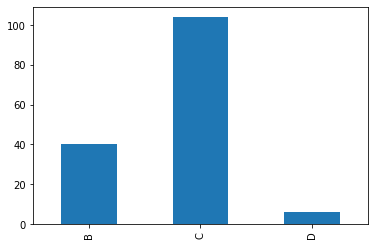

In [94]:
grade_counts.plot.bar()

In [96]:
import scipy.stats

final_data['Final Score'].plot.hist(bins=20, label='Grade Distribution')

ModuleNotFoundError: No module named 'scipy'